loading data
starting task 1
printing dataframe
       Status  Power_range_sensor_1  Power_range_sensor_2  \
0      Normal              4.504400              0.744300   
1      Normal              4.428400              0.907300   
2      Normal              4.529100              1.019900   
3      Normal              5.172700              1.000700   
4      Normal              5.225800              0.612500   
..        ...                   ...                   ...   
991  Abnormal             10.742844              9.529860   
992  Abnormal              9.459786              9.807198   
993  Abnormal              9.264558              9.507420   
994  Abnormal             10.251714              9.625026   
995  Abnormal             10.923078             10.131252   

     Power_range_sensor_3   Power_range_sensor_4  Pressure _sensor_1  \
0                 6.340000              1.905200           29.531500   
1                 5.643300              1.623200           27.503200   
2  

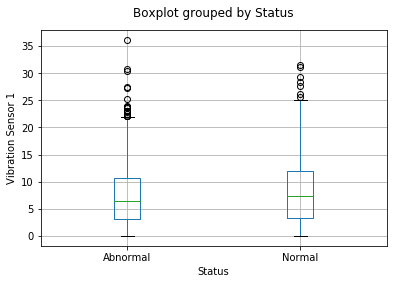

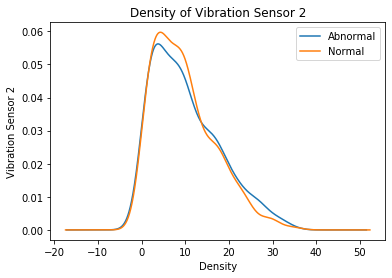

starting task 3
converting catagorical variables
splitting data
running scaler
running MLP
printing report
              precision    recall  f1-score   support

           0       0.68      0.76      0.72        45
           1       0.78      0.71      0.74        55

    accuracy                           0.73       100
   macro avg       0.73      0.73      0.73       100
weighted avg       0.73      0.73      0.73       100

running bonus task


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


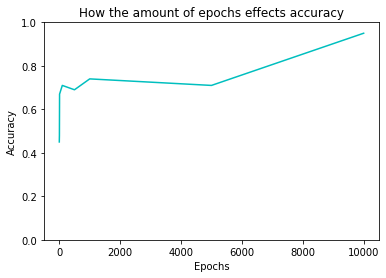

running cLF 5
printing report
              precision    recall  f1-score   support

           0       0.85      0.98      0.91        45
           1       0.98      0.85      0.91        55

    accuracy                           0.91       100
   macro avg       0.91      0.92      0.91       100
weighted avg       0.92      0.91      0.91       100

running cLF 50
printing report
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        45
           1       0.93      0.76      0.84        55

    accuracy                           0.84       100
   macro avg       0.85      0.85      0.84       100
weighted avg       0.86      0.84      0.84       100

running bonus task 2


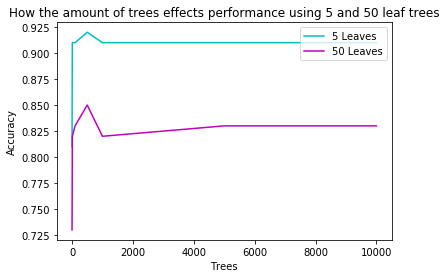

starting task 4
running 3 layers
running layer
finished layer
running layer
finished layer
running layer
finished layer


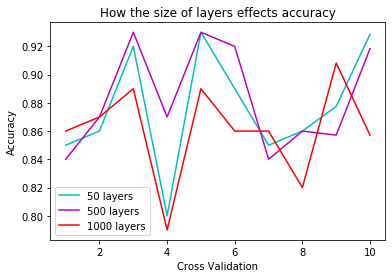

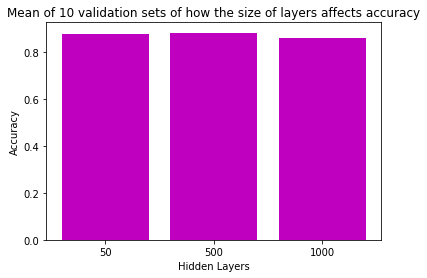

Layer Results
[0.8766122448979592, 0.8835510204081632, 0.8605306122448979]
running 3 trees
running tree
finished tree
running tree
finished tree
running tree
finished tree


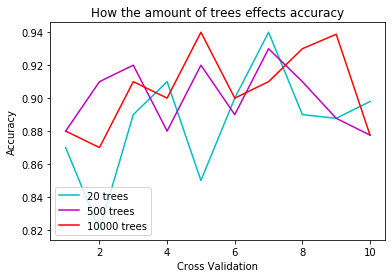

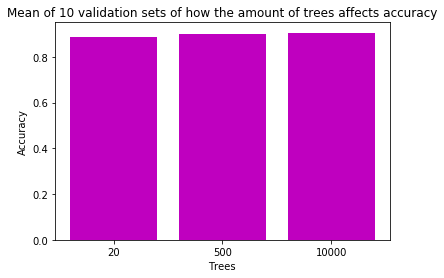

Tree Results
[0.8855714285714285, 0.9005306122448979, 0.9056326530612244]


<Figure size 432x288 with 0 Axes>

In [8]:
#import libs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

def getData():
    print('loading data')
    # load the data and return
    file = pd.read_csv('CMP3751M_CMP9772M_ML_Assignment 2-dataset-nuclear_plants_final.csv')
    return file

#import dataset
csv = getData()
csv.head()

#Task 1
print('starting task 1')
print('printing dataframe')
#print the dataframe
print(csv)
print('describing data')
#describe the data
print(csv.describe().transpose())
print('printing shape')
#get the shape of the data
print(csv.shape)
print('printing null check')
#check for null values
print(csv.isnull())
print('printing types')
#check the datatypes for catagorical data
print(csv.dtypes)

#box plot vibration sensor 1 values, split by status 
csv.boxplot(column = 'Vibration_sensor_1', by = 'Status')
plt.title('')
plt.ylabel('Vibration Sensor 1')
plt.show()
plt.figure()

#density plot of vibration sensor 2 values, split by status 
csv.groupby('Status').Vibration_sensor_2.plot.kde(legend='True')
plt.title('Density of Vibration Sensor 2')
plt.xlabel('Density')
plt.ylabel('Vibration Sensor 2')
plt.show()
plt.figure()

#Task 3
print('starting task 3')
print('converting catagorical variables')
#replace normal with 1 and abnormal with 0
csv.Status.replace(['Normal', 'Abnormal'], [1, 0], inplace=True)

print('splitting data')
#split training and test into x and y, y being the status column
y = csv.iloc[:, 0:1]
x = csv.iloc[:, 1:]

#split data into training and test 9:1
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.10)

print('running scaler')
#normalise/scale the data
ss = preprocessing.StandardScaler()
ss.fit(trainx)
trainx = ss.transform(trainx)
testx = ss.transform(testx)

print('running MLP')
#Use multi layered perceptron classifier to predict the output
mLP = MLPClassifier(hidden_layer_sizes=(500, 500), max_iter=1000, activation='logistic')
setattr(mLP, "out_activation_", "logistic")
mLP.fit(trainx, trainy.values.ravel())
predictions = mLP.predict(testx)
print('printing report')
print(classification_report(testy,predictions))

#Bonus Task
print('running bonus task')
stuffToDo = [1,5,10,100,500,1000,5000,10000]
outputList = list()
for epochs in range(len(stuffToDo)):
    mLP = MLPClassifier(hidden_layer_sizes=(500, 500), max_iter=stuffToDo[epochs], activation='logistic', tol=0)
    setattr(mLP, "out_activation_", "logistic")
    mLP.fit(trainx, trainy.values.ravel())
    predictions = mLP.predict(testx)
    outputList.append(accuracy_score(testy,predictions))

plt.title('How the amount of epochs effects accuracy')
plt.plot(stuffToDo,outputList,color='c')
plt.ylim(ymin=0, ymax = 1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()
plt.figure()

#Use a random forest classifier to predict the output with 5 leaves
print('running cLF 5')
cLF5 = RandomForestClassifier(n_estimators = 1000, min_samples_leaf = 5)
cLF5.fit(trainx,trainy.values.ravel())
clfpredictions = cLF5.predict(testx)
print('printing report')
print(classification_report(testy,clfpredictions))

#Use a random forest classifier to predict the output with 50 leaves
print('running cLF 50')
cLF50 = RandomForestClassifier(n_estimators = 1000, min_samples_leaf = 50)
cLF50.fit(trainx,trainy.values.ravel())
clfpredictions2 = cLF50.predict(testx)
print('printing report')
print(classification_report(testy,clfpredictions2))


#Bonus Task 2
print('running bonus task 2')
stuffToDo = [1,5,10,100,500,1000,5000,10000]
outputList5 = list()
outputList50 = list()
for trees in range(len(stuffToDo)):
    cLF5 = RandomForestClassifier(n_estimators = stuffToDo[trees], min_samples_leaf = 5)
    cLF50 = RandomForestClassifier(n_estimators = stuffToDo[trees], min_samples_leaf = 50)
    cLF5.fit(trainx, trainy.values.ravel())
    cLF50.fit(trainx, trainy.values.ravel())
    predictions5 = cLF5.predict(testx)
    predictions50 = cLF50.predict(testx)
    outputList5.append(accuracy_score(testy,predictions5))
    outputList50.append(accuracy_score(testy,predictions50))
    
plt.plot(stuffToDo,outputList5, 'c')
plt.plot(stuffToDo,outputList50, 'm')
plt.title('How the amount of trees effects performance using 5 and 50 leaf trees')
plt.legend(('5 Leaves', '50 Leaves'), loc = 'upper right')
plt.xlabel('Trees')
plt.ylabel('Accuracy')
plt.show()
plt.figure()

#Task 4
print('starting task 4')
kFold = StratifiedKFold(n_splits=10, shuffle=True)

layersArr = [50,500,1000]
treesArr = [20,500,10000]
col = ['c','m','r']
tenArr = [1,2,3,4,5,6,7,8,9,10]
colour = 0;
layerResults=list()
treeResults=list()

print('running 3 layers')
for layers in layersArr:
    print('running layer')
    mLP = MLPClassifier(hidden_layer_sizes=(layers, layers), max_iter=1000, activation='logistic')
    setattr(mLP, "out_activation_", "logistic")
    results = cross_val_score(mLP,x,y,cv=kFold, n_jobs=-1)
    plt.plot(tenArr,results,col[colour])
    layerResults.append(results.mean())
    colour = colour+1
    print('finished layer')

plt.title('How the size of layers effects accuracy')
plt.xlabel('Cross Validation')
plt.ylabel('Accuracy')
plt.legend(('50 layers', '500 layers', '1000 layers'), loc = 'lower left')
plt.show()
plt.figure()

plt.title('Mean of 10 validation sets of how the size of layers affects accuracy')
plt.xlabel('Hidden Layers')
plt.ylabel('Accuracy')
plt.bar(['50','500','1000'],layerResults, color='m')
plt.show()
plt.figure()

print('Layer Results')
print(layerResults)
colour = 0;

print('running 3 trees')
for trees in treesArr:
    print('running tree')
    cLF = RandomForestClassifier(n_estimators = trees, min_samples_leaf = 5)
    results = cross_val_score(cLF,x,y,cv=kFold, n_jobs=-1)
    plt.plot(tenArr,results,col[colour])
    treeResults.append(results.mean())
    colour = colour+1
    print('finished tree')


plt.title('How the amount of trees effects accuracy')
plt.xlabel('Cross Validation')
plt.ylabel('Accuracy')
plt.legend(('20 trees', '500 trees', '10000 trees'), loc = 'lower left')
plt.show()
plt.figure()

plt.title('Mean of 10 validation sets of how the amount of trees affects accuracy')
plt.xlabel('Trees')
plt.ylabel('Accuracy')
plt.bar(['20','500','10000'],treeResults, color='m')
plt.show()
plt.figure()

print('Tree Results')
print(treeResults)